In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import sklearn

In [5]:
sklearn.__version__

'0.21.2'

## Generating  the data for KNN
- Generate values for class 0
    - Generate 50,x1 valuess within the range 0 to 50
    - Generate 50,x2 values within range 1 to 50
    - craeate a 2d array with x1 values as 0 th element and x2 values as 1st element,3rd value as zero
    - o/p -- [[2,5,0],[3,10,0],[24,12,0]]
- Generate values for class 1
   - Generate 50,x1 valuess within the range 50 to 100
   - Generate 50,x2 values within range 1 to 50
   - craeate a 2d array with x1 values as 0 th element and x2 values as 1st element,3rd value as one
- create a 2d array which consists both classes data
- create a DataFrame from this data with added Y column

In [139]:
np.random.seed(10)
x1 = np.random.randint(0,50,50)
x2 = np.random.randint(1,50,50)


In [141]:
np.hstack((x1,x2))

array([ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40, 36,
       16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25, 13, 28,
       22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23, 30, 11, 29,
       11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34, 21, 33,
       25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,  7, 22, 43,
       23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34, 46, 41])

In [142]:
np.vstack((x1,x2))

array([[ 9, 36, 15,  0, 49, 28, 25, 29, 48, 29, 49,  8,  9,  0, 42, 40,
        36, 16, 36, 47, 11, 24, 43, 33,  8, 36, 14, 49, 13,  5, 13, 25,
        13, 28, 22, 30, 30, 25, 12,  1, 31, 36, 27, 18, 29, 13, 22, 23,
        30, 11],
       [29, 11, 25, 10, 16, 19, 17,  8, 25, 12, 18, 47,  8, 12, 29, 34,
        21, 33, 25, 45,  6,  5,  8, 25, 25, 45, 35, 41, 16, 14, 25, 16,
         7, 22, 43, 23, 12, 49, 13, 29, 33, 16, 45, 41, 43, 46, 44, 34,
        46, 41]])

In [143]:
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.zeros(50,dtype=int),1)

In [144]:
d0=np.hstack((x1_2d,x2_2d,y_2d))
d0

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [145]:
np.random.seed(15)
x1 = np.random.randint(50,100,50)
x2 = np.random.randint(1,50,50)
x1_2d = np.expand_dims(x1,1)
x2_2d = np.expand_dims(x2,1)
y_2d = np.expand_dims(np.ones(50,dtype=int),1)
d1=np.hstack((x1_2d,x2_2d,y_2d))
d1

array([[58,  3,  1],
       [62, 43,  1],
       [55, 33,  1],
       [50, 38,  1],
       [78,  8,  1],
       [77, 25,  1],
       [57, 38,  1],
       [61, 46,  1],
       [71, 20,  1],
       [97, 49,  1],
       [79, 41,  1],
       [67, 30,  1],
       [95, 13,  1],
       [81, 25,  1],
       [73, 47,  1],
       [82, 13,  1],
       [60, 34,  1],
       [65,  3,  1],
       [54, 25,  1],
       [91, 45,  1],
       [89, 43,  1],
       [87, 18,  1],
       [69, 24,  1],
       [94, 30,  1],
       [63, 35,  1],
       [79, 24,  1],
       [65, 19,  1],
       [88, 27,  1],
       [65, 27,  1],
       [99, 17,  1],
       [51, 14,  1],
       [81, 27,  1],
       [82, 33,  1],
       [71,  7,  1],
       [76,  5,  1],
       [84, 29,  1],
       [61, 21,  1],
       [51, 36,  1],
       [90, 40,  1],
       [56, 29,  1],
       [91,  6,  1],
       [84,  1,  1],
       [90, 10,  1],
       [72, 49,  1],
       [90, 21,  1],
       [65, 47,  1],
       [78, 39,  1],
       [85, 3

In [146]:
data = np.vstack((d0,d1))
data

array([[ 9, 29,  0],
       [36, 11,  0],
       [15, 25,  0],
       [ 0, 10,  0],
       [49, 16,  0],
       [28, 19,  0],
       [25, 17,  0],
       [29,  8,  0],
       [48, 25,  0],
       [29, 12,  0],
       [49, 18,  0],
       [ 8, 47,  0],
       [ 9,  8,  0],
       [ 0, 12,  0],
       [42, 29,  0],
       [40, 34,  0],
       [36, 21,  0],
       [16, 33,  0],
       [36, 25,  0],
       [47, 45,  0],
       [11,  6,  0],
       [24,  5,  0],
       [43,  8,  0],
       [33, 25,  0],
       [ 8, 25,  0],
       [36, 45,  0],
       [14, 35,  0],
       [49, 41,  0],
       [13, 16,  0],
       [ 5, 14,  0],
       [13, 25,  0],
       [25, 16,  0],
       [13,  7,  0],
       [28, 22,  0],
       [22, 43,  0],
       [30, 23,  0],
       [30, 12,  0],
       [25, 49,  0],
       [12, 13,  0],
       [ 1, 29,  0],
       [31, 33,  0],
       [36, 16,  0],
       [27, 45,  0],
       [18, 41,  0],
       [29, 43,  0],
       [13, 46,  0],
       [22, 44,  0],
       [23, 3

In [147]:
df = pd.DataFrame(data,columns=['x1','x2','y'])
df.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [148]:
df.to_csv("knn.csv")

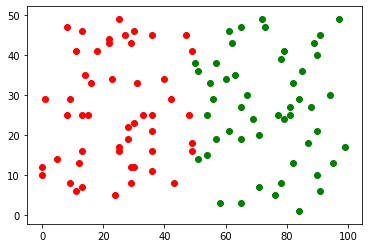

In [149]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')

In [150]:
#plt.scatter(df['x1'][:50],df['x2'][:50],color='r')

In [151]:
outcome=df['y']
features =df [['x1','x2']]
outcome[0],features.iloc[0]

(0, x1     9
 x2    29
 Name: 0, dtype: int32)

In [152]:
import math

In [153]:
def eucledian_distance(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [154]:
eucledian_distance((4,3),(0,0))

5.0

In [173]:
def knearest_points(p,d,k):
    ''' p - new data
        d - all the features as numpy array
        k - no of features 
        returns the knearest neighbors'''
    # create an empty list to sort the distances
    distances = []
    for row in d:
        distances.append(eucledian_distance(row,p))
    # convert the list into numpy array
    distances = np.array(distances)
    # sort the numpy array get the indices based on sorted values
    # use the indices to get the k nearest neighbors 
    #return d[distances.argsort()[:k]]
    return distances.argsort()[:k]
    #return disances
        

In [156]:
l = [45,4,7,12,74,15]
l = np.array(l)
l.argsort()

array([1, 2, 3, 5, 0, 4], dtype=int64)

In [157]:
for row in features.values:
    print(row)
    break

[ 9 29]


In [168]:
knearest_points((47,25),features.values,10)

array([[48, 25],
       [42, 29],
       [54, 25],
       [49, 18],
       [49, 16],
       [56, 29],
       [36, 25],
       [55, 33],
       [40, 34],
       [57, 19]])

In [169]:
ind = knearest_points((47,25),features.values,10)

In [160]:
features.values[ind]

array([[48, 25],
       [42, 29],
       [54, 25],
       [49, 18],
       [49, 16],
       [56, 29],
       [36, 25],
       [55, 33],
       [40, 34],
       [57, 19]])

In [161]:
outcome[ind]

8     0
14    0
68    1
10    0
4     0
89    1
18    0
52    1
15    0
99    1
Name: y, dtype: int32

In [162]:
outcome[ind].value_counts()

0    6
1    4
Name: y, dtype: int64

In [163]:
outcome[ind].value_counts().index[0]

0

In [170]:
near_4 = knearest_points((47,25),features.values,10)

In [171]:
near_4 [:,0]

array([48, 42, 54, 49, 49, 56, 36, 55, 40, 57])

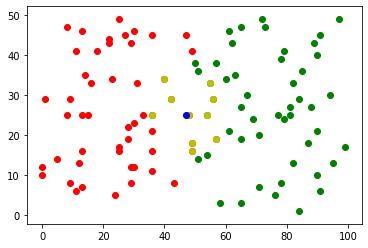

In [172]:
plt.scatter(df['x1'][:50],df['x2'][:50],color='r')
plt.scatter(df['x1'][50:],df['x2'][50:],color='g')
plt.plot(47,25,'bo')
plt.scatter(near_4[:,0],near_4[:,1],color='y')

In [174]:
ind = knearest_points((5,34),features.values,4)
features.values[ind]
outcome[ind]
outcome[ind].value_counts()
outcome[ind].value_counts().index[0]

0

In [175]:
def output(p,k,features,outcome):
    ind = knearest_points(p,features.values,k)
    return outcome[ind].value_counts().index[0]
output((34,49),10,features,outcome)

0

In [176]:
for i,feature in features.iterrows():
    print(feature)
    break

x1     9
x2    29
Name: 0, dtype: int32
